In [1]:
import pandas as pd

In [48]:
ratings_df = pd.read_csv('MovieLens/rating.csv')

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
ratings_df['userId'].nunique()

138493

In [5]:
ratings_df['movieId'].nunique()

26744

In [6]:
len(ratings_df)

20000263

In [7]:
max(ratings_df['movieId'])

131262

In [8]:
max(ratings_df['userId'])

138493

In [9]:
min(ratings_df['userId'])

1

In [10]:
min(ratings_df['movieId'])

1

In [11]:
ratings_df['rating'].mean()

3.5255285642993797

In [12]:
ratings_df['rating'].std()

1.0519889192942424

In [13]:
ratings_df['rating'].min()

0.5

In [15]:
import matplotlib.pyplot as plt

(array([ 239125.,  680732.,  279252., 1430997.,  883398., 4291193.,
        2200156., 5561926., 1534824., 2898660.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

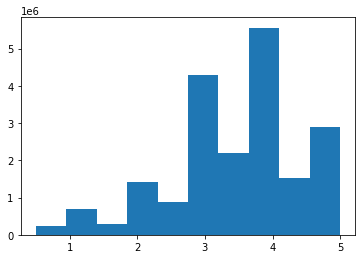

In [16]:
plt.hist(ratings_df['rating'])

In [17]:
movie_df = pd.read_csv('MovieLens/movie.csv')

In [18]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
max(movie_df['genres'].apply(lambda x: len(x.split('|'))))

10

In [20]:
genre_list = movie_df['genres'].apply(lambda x: x.split('|'))

In [21]:
categories = genre_list[genre_list.apply(lambda x: len(x)==10)].tolist()[0]

In [22]:
categories

['Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Drama',
 'Film-Noir',
 'Horror',
 'Mystery',
 'Thriller',
 'Western']

In [23]:
movies_categories_df = pd.DataFrame(columns=['MovieID', *categories])

In [24]:
movies_categories_df.columns

Index(['MovieID', 'Action', 'Adventure', 'Comedy', 'Crime', 'Drama',
       'Film-Noir', 'Horror', 'Mystery', 'Thriller', 'Western'],
      dtype='object')

In [25]:
for i in range(len(movie_df)):
    row = movie_df.iloc[i]
    
    if row['genres'].count('|') == 0:
        continue
    else:
        
        data = {
            'MovieID': row['movieId'],
        }
        
        genres = row['genres'].split('|')
        
        for category in categories:
            
            data[category] = int(category in genres)
            
        movies_categories_df = movies_categories_df.append(data, ignore_index=True)

In [26]:
movies_categories_df.shape

(16449, 11)

In [27]:
movies_categories_df.head()

,MovieID,Action,Adventure,Comedy,Crime,Drama,Film-Noir,Horror,Mystery,Thriller,Western
0,1,0,1,1,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,0,1,0,0,0,0,0
4,6,1,0,0,1,0,0,0,0,1,0


In [32]:
num_unique_users_with_ratings = ratings_df['userId'].nunique()

In [33]:
num_unique_movies_rated = ratings_df['movieId'].nunique()

In [34]:
num_ratings = len(ratings_df)

In [35]:
print(f'Sparsity -> {100 -(num_ratings/(num_unique_users_with_ratings*num_unique_movies_rated))*100 :.2f}%')

Sparsity -> 99.46%


In [36]:
movies_categories_df.to_csv('MovieLens/movie_categories.csv')

In [49]:
# Half ratings should be rounded down

def fix_rating(rating):
    # attempt to correct the rating based on the class imbalance
    
    if rating == 4.5:
        rating = 5
        
    if rating == 3.5:
        rating = 3
        
    if rating == 2.5:
        rating = rating = 2
        
    if rating == 1.5:
        rating = 1
        
    if rating == .5:
        rating = 1
        
    return rating


ratings_df['rating'] = ratings_df['rating'].apply(fix_rating)


(array([1199109.,       0., 2314395.,       0.,       0., 6491349.,
              0., 5561926.,       0., 4433484.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

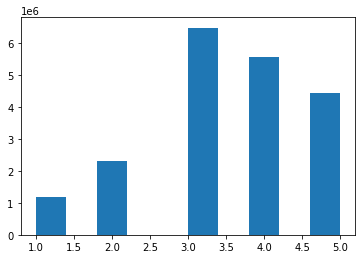

In [50]:
plt.hist(ratings_df['rating'])

In [51]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df, test_size=.1, random_state=44)

In [52]:
train_data.shape

(18000236, 4)

In [53]:
test_data.shape

(2000027, 4)

(array([1079173.,       0., 2083216.,       0.,       0., 5842341.,
              0., 5004469.,       0., 3991037.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

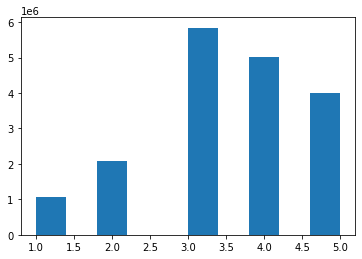

In [55]:
plt.hist(train_data['rating'])

(array([119936.,      0., 231179.,      0.,      0., 649008.,      0.,
        557457.,      0., 442447.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

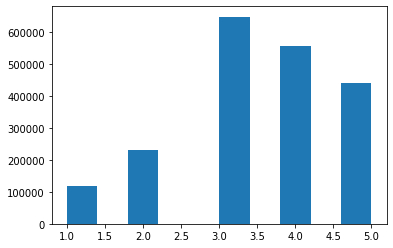

In [56]:
plt.hist(test_data['rating'])

In [58]:
train_data.to_csv('MovieLens/ratings_train.csv')
test_data.to_csv('MovieLens/ratings_test.csv')